Connected to Python 3.13.1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
peminjaman = pd.read_csv('data/peminjaman_new.csv', sep=';', engine='python')

In [5]:
peminjaman.describe()

,Januari,Februari,Maret,April,Mei,Juni
count,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000
mean,0.116531,0.247516,1.234869,0.470641,0.716350,0.441734
std,0.486683,0.700155,2.707056,1.446388,1.542917,1.298557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,6.000000,7.000000,37.000000,15.000000,18.000000,16.000000


In [6]:
peminjaman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Judul     1107 non-null   object
 1   Januari   1107 non-null   int64 
 2   Februari  1107 non-null   int64 
 3   Maret     1107 non-null   int64 
 4   April     1107 non-null   int64 
 5   Mei       1107 non-null   int64 
 6   Juni      1107 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 60.7+ KB


Text(0.5, 1.0, 'Grafik Peminjaman')

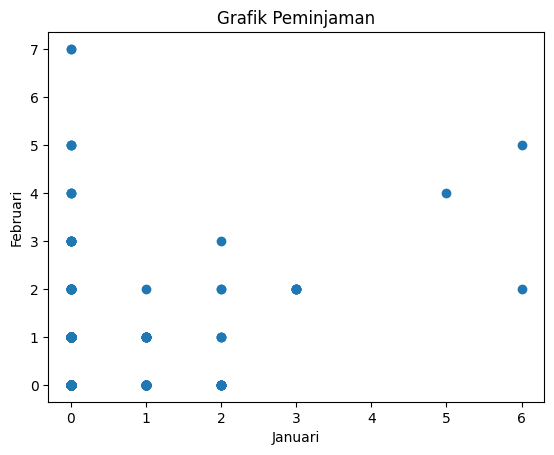

In [15]:
plt.scatter(peminjaman['Januari'],peminjaman['Februari'])
plt.xlabel('Januari')
plt.ylabel('Februari')
plt.title('Grafik Peminjaman')

Text(0.5, 1.0, 'Grafik Peminjaman')

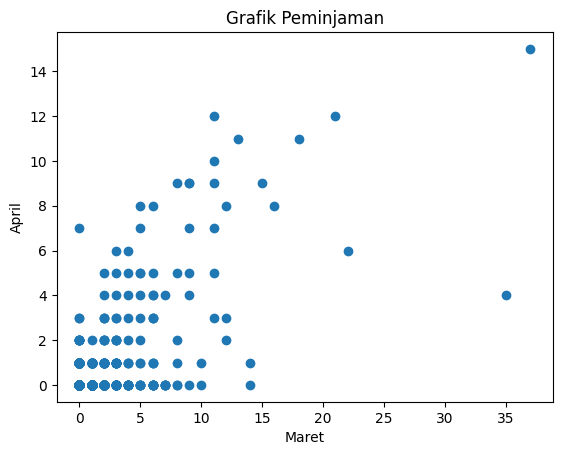

In [16]:
plt.scatter(peminjaman['Maret'],peminjaman['April'])
plt.xlabel('Maret')
plt.ylabel('April')
plt.title('Grafik Peminjaman')

Text(0.5, 1.0, 'Grafik Peminjaman')

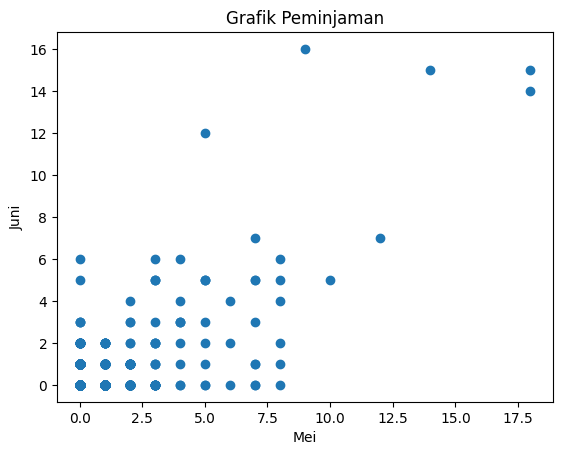

In [17]:
plt.scatter(peminjaman['Mei'],peminjaman['Juni'])
plt.xlabel('Mei')
plt.ylabel('Juni')
plt.title('Grafik Peminjaman')

In [18]:
x_train = peminjaman[['Januari','Februari','Maret','April','Mei','Juni']].values

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(x_train)

array([[0.16666667, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.14285714, 0.08108108, 0.06666667, 0.05555556,
        0.0625    ],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0625    ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0625    ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0625    ]])

In [24]:
x_train

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 1, 3, 1, 1, 1],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [49]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean

KMeans(n_clusters=2)

In [50]:
y_cluster = kmean.fit_predict(x_train)

In [51]:
y_cluster

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [52]:
peminjaman['Cluster'] = y_cluster

In [53]:
peminjaman

,Judul,Januari,Februari,Maret,April,Mei,Juni,Cluster
0,Atheis,1,0,0,0,0,0,0
1,Mencari tepi langit,1,0,0,0,0,0,0
2,Harga sebuah percaya,1,1,3,1,1,1,0
3,Gadis kretek,1,0,2,1,0,0,0
4,Model-model pembelajaran inovatif,3,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...
1102,POLITIK (LA POLITICA),0,0,0,0,0,1,0
1103,Akuntansi Keperilakuan toeri dan implementasi,0,0,0,0,0,1,0
1104,3 Undang-undang dasar republik Indonesia,0,0,0,0,0,1,0
1105,Practical comunication skill,0,0,0,0,0,1,0


In [54]:
kmean.cluster_centers_

array([[ 0.11038354,  0.23479888,  0.85874649,  0.27315248,  0.53882133,
         0.29560337],
       [ 0.28947368,  0.60526316, 11.81578947,  6.02631579,  5.71052632,
         4.55263158]])

C:\Users\Asus\AppData\Local\Temp\ipykernel_20280\651125238.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[0,0],kmean.cluster_centers_[0,1],cmap='rainbow',marker='*',s=150,label='Centroid 0')
C:\Users\Asus\AppData\Local\Temp\ipykernel_20280\651125238.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1,1],cmap='rainbow',marker='*',s=150,label='Centroid 1')


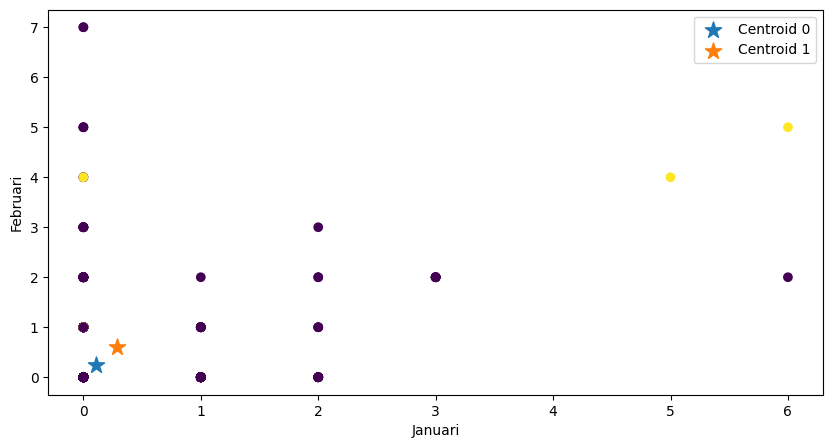

In [55]:
plt.figure(figsize=(10,5))
plt.scatter(x_train[:,0],x_train[:,1],c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0,0],kmean.cluster_centers_[0,1],cmap='rainbow',marker='*',s=150,label='Centroid 0')
plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1,1],cmap='rainbow',marker='*',s=150,label='Centroid 1')
# plt.scatter(kmean.cluster_centers_[2,0],kmean.cluster_centers_[2,1],cmap='rainbow',marker='*',s=150,label='Centroid 2')
plt.xlabel('Januari')
plt.ylabel('Februari')
plt.legend()

C:\Users\Asus\AppData\Local\Temp\ipykernel_20280\3769389985.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[0,0],kmean.cluster_centers_[0,2],cmap='rainbow',marker='*',s=150,label='Centroid 0')
C:\Users\Asus\AppData\Local\Temp\ipykernel_20280\3769389985.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1,2],cmap='rainbow',marker='*',s=150,label='Centroid 1')


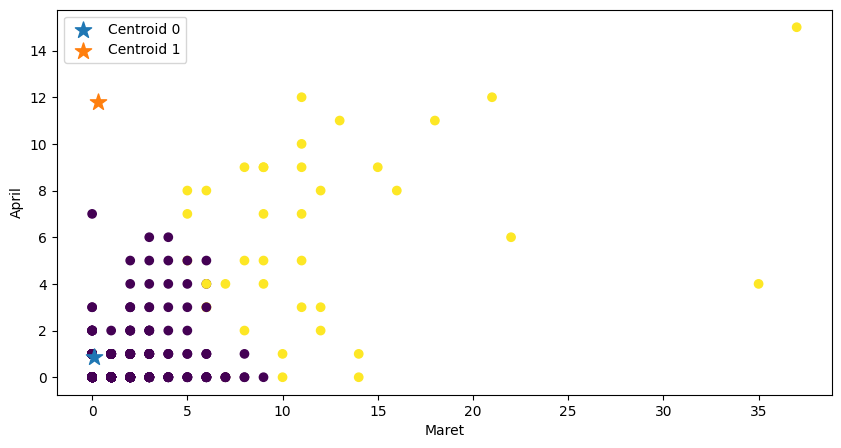

In [56]:
plt.figure(figsize=(10,5))
plt.scatter(x_train[:,2],x_train[:,3],c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0,0],kmean.cluster_centers_[0,2],cmap='rainbow',marker='*',s=150,label='Centroid 0')
plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1,2],cmap='rainbow',marker='*',s=150,label='Centroid 1')
# plt.scatter(kmean.cluster_centers_[2,0],kmean.cluster_centers_[2,2],cmap='rainbow',marker='*',s=150,label='Centroid 2')
plt.xlabel('Maret')
plt.ylabel('April')
plt.legend()

C:\Users\Asus\AppData\Local\Temp\ipykernel_20280\2209419721.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[0,0],kmean.cluster_centers_[0,3],cmap='rainbow',marker='*',s=150,label='Centroid 0')
C:\Users\Asus\AppData\Local\Temp\ipykernel_20280\2209419721.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1,3],cmap='rainbow',marker='*',s=150,label='Centroid 1')


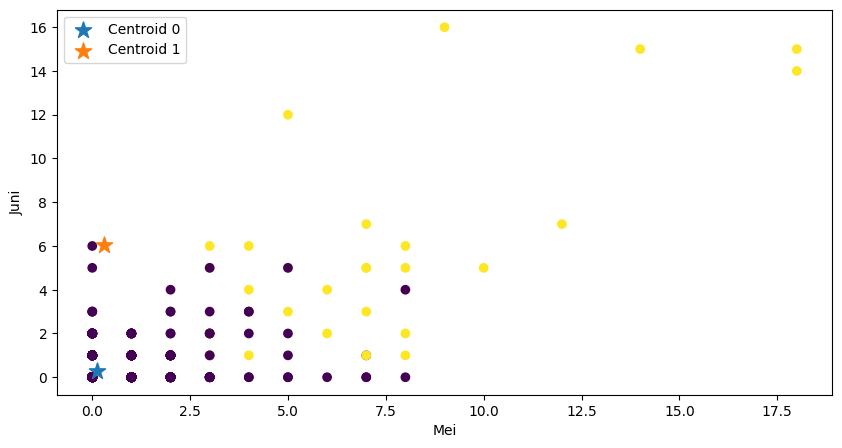

In [57]:
plt.figure(figsize=(10,5))
plt.scatter(x_train[:,4],x_train[:,5],c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0,0],kmean.cluster_centers_[0,3],cmap='rainbow',marker='*',s=150,label='Centroid 0')
plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1,3],cmap='rainbow',marker='*',s=150,label='Centroid 1')
# plt.scatter(kmean.cluster_centers_[2,0],kmean.cluster_centers_[2,3],cmap='rainbow',marker='*',s=150,label='Centroid 2')
plt.xlabel('Mei')
plt.ylabel('Juni')
plt.legend()

In [58]:
inertias = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k).fit(x_train)
    inertias.append(km.inertia_)

In [59]:
inertias

[15720.803974706469,
 8449.14752567696,
 6544.971844660178,
 5682.607788306546,
 4730.694782736678,
 4332.766295927251,
 4212.76658527904,
 3611.1299254328933,
 3389.3026701678505]

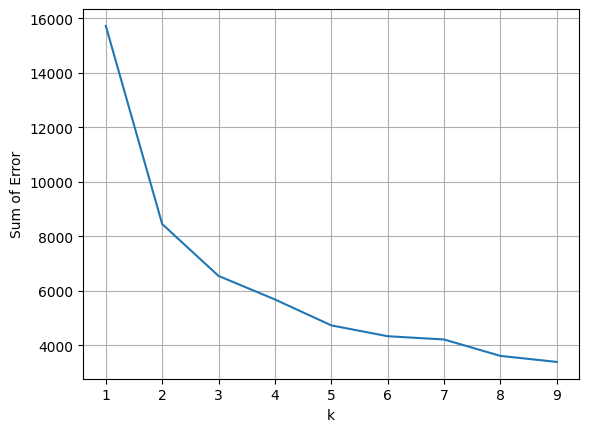

In [60]:
plt.xlabel("k")
plt.ylabel("Sum of Error")
plt.plot(k_range,inertias)
plt.grid()

In [61]:
peminjaman['Cluster'] = peminjaman['Cluster'].replace([0,1],['Jarang','Sering'])

In [62]:
peminjaman

,Judul,Januari,Februari,Maret,April,Mei,Juni,Cluster
0,Atheis,1,0,0,0,0,0,Jarang
1,Mencari tepi langit,1,0,0,0,0,0,Jarang
2,Harga sebuah percaya,1,1,3,1,1,1,Jarang
3,Gadis kretek,1,0,2,1,0,0,Jarang
4,Model-model pembelajaran inovatif,3,2,1,0,0,0,Jarang
...,...,...,...,...,...,...,...,...
1102,POLITIK (LA POLITICA),0,0,0,0,0,1,Jarang
1103,Akuntansi Keperilakuan toeri dan implementasi,0,0,0,0,0,1,Jarang
1104,3 Undang-undang dasar republik Indonesia,0,0,0,0,0,1,Jarang
1105,Practical comunication skill,0,0,0,0,0,1,Jarang
